Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [2]:
!pip install seglearn
!pip install tsfresh
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys,os
import pandas as pd
from seglearn.transform import SegmentX
from seglearn.feature_functions import maximum,minimum
from sklearn.preprocessing import normalize,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import svm


names = ["cjc", "qst", "smj"]
PATH = 'output_old/'

x=[]
y=[]
X=[]
flag = 0
for i in range(300):
    x.append([])
for people in range(3):
    for i in range(1, 11):
        for j in range(10):
            curr_file = PATH + names[people] + '_' + str(i) + '_' + str(j) + '_filtered.txt'
            data = []
            with open(curr_file,'r') as file:
                for line in file:
                    line = line[:-2]
                    data.append(line.split(","))
            y.append(i-1)
            data = np.array(data)
            data = data.reshape(-1,1)
            
            for _ in range(45040):
                if(_<len(data)):
                    x[people*100+(i-1)*10+j].append(float(data[_]))
                else:
                    x[people*100+(i-1)*10+j].append(0)
            flag=1


In [5]:
x_sub = []
t = []
for i in range(300):
    x_sub.append([])
from tsfresh import extract_features
for i in range(300):
    temp = x[i][:]
    for j in range(4504):
        if(i==0):t.append(j)
        x_sub[i].append(temp[j*10:j*10+9][np.argmax(np.abs(temp[j*10:j*10+9]))])
#     temp = np.array(x[0]).reshape(-1,1)
#     tempt = np.array(t).reshape(-1,1)
#     print(temp.shape)
#     print(tempt.shape)
#     res = np.append(tempt,temp,axis=1)
#     temp = np.array(x[1]).reshape(-1,1)
#     print(res.shape)
#     X = pd.DataFrame(data=res,
#                  index=[i for i in range(len(temp.tolist()))],
#                  columns=['time','v'])
#     X.insert(0, 'id', range(len(res)))
#     features = extract_features(X, column_id="id", column_sort="time")
#     #     features_filtered_direct = extract_relevant_features(res, pd.Series([1]), column_id='ID', column_sort='time')

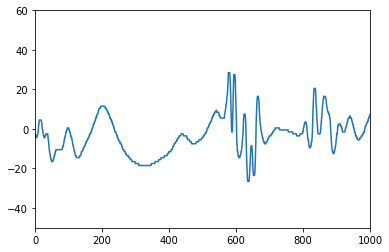

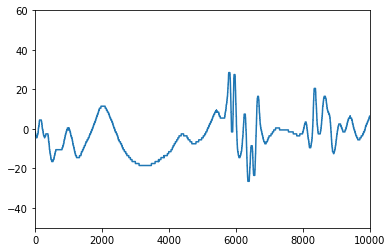

In [6]:
plt.plot(x_sub[50])
plt.axis([0,1000,-50,60])
plt.show()
plt.figure()
plt.plot(x[50])
plt.axis([0,10000,-50,60])
plt.show()

In [7]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [8]:
from tsfresh import extract_features
for i in range(300):
    temp = np.array(x_sub[i]).reshape(-1,1)
    tempt = np.array(t).reshape(-1,1)
    res = np.append(tempt,temp,axis=1)
#     print(res.shape)
    tempdf = pd.DataFrame(data=res,
                 index=[j for j in range(len(t)*i,len(t)*i+len(t))],
                 columns=['time','v'])
    tempdf.insert(0, 'id',[i]*len(t))
#     print(tempdf)
    if(i==0):
        X = tempdf
    else:
        X = X.append(tempdf)
# features_1000 = extract_features(X, column_id="id", column_sort="time")
    #     features_filtered_direct = extract_relevant_features(res, pd.Series([1]), column_id='ID', column_sort='time')

[]

In [9]:

# print(X)
y = pd.Series(y)
print(y)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     2
21     2
22     2
23     2
24     2
25     2
26     2
27     2
28     2
29     2
      ..
270    7
271    7
272    7
273    7
274    7
275    7
276    7
277    7
278    7
279    7
280    8
281    8
282    8
283    8
284    8
285    8
286    8
287    8
288    8
289    8
290    9
291    9
292    9
293    9
294    9
295    9
296    9
297    9
298    9
299    9
Length: 300, dtype: int64


In [10]:
from tsfresh import extract_relevant_features

extracted_features = extract_features(X, column_id='id', column_sort='time')

Feature Extraction: 100%|██████████| 15/15 [1:28:25<00:00, 325.40s/it]


In [19]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
impute(extracted_features)
features_filtered = select_features(extracted_features, y)

In [21]:
features_filtered.to_csv("features_filtered.csv")

In [0]:
X.insert(0,'time',t)
X.insert(1,'value',x)
X.insert(0, 'ID', range(len(t)))
X

In [0]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [0]:
y

1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
      ...  
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
67    False
68     True
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84    False
85    False
86    False
87    False
88    False
Length: 88, dtype: bool

In [0]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()
print(timeseries.head())
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")
extracted_features
features_filtered_direct = extract_relevant_features(timeseries, y,
                                                     column_id='id', column_sort='time')


In [0]:
features_filtered_direct

variable,F_x__value_count__value_-1,F_x__abs_energy,F_x__range_count__max_1__min_-1,F_y__abs_energy,T_y__variance,T_y__standard_deviation,"F_x__fft_coefficient__coeff_1__attr_""abs""","T_y__fft_coefficient__coeff_1__attr_""abs""",T_y__abs_energy,F_z__standard_deviation,"F_z__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""intercept""",F_z__variance,F_x__standard_deviation,F_x__variance,F_x__ratio_value_number_to_time_series_length,T_x__standard_deviation,T_x__variance,"T_x__fft_coefficient__coeff_1__attr_""abs""","T_y__fft_coefficient__coeff_2__attr_""abs""",F_x__cid_ce__normalize_True,F_x__autocorrelation__lag_1,F_x__partial_autocorrelation__lag_1,T_y__percentage_of_reoccurring_values_to_all_values,"T_y__fft_coefficient__coeff_4__attr_""abs""",T_x__ratio_value_number_to_time_series_length,"F_z__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""intercept""","F_y__fft_coefficient__coeff_0__attr_""abs""",T_y__percentage_of_reoccurring_datapoints_to_all_datapoints,"T_y__fft_coefficient__coeff_3__attr_""abs""",T_x__abs_energy,"F_x__fft_coefficient__coeff_2__attr_""abs""","T_y__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""intercept""","F_z__fft_coefficient__coeff_1__attr_""abs""","F_y__fft_coefficient__coeff_1__attr_""abs""","T_x__fft_coefficient__coeff_5__attr_""abs""","T_x__fft_coefficient__coeff_2__attr_""abs""","F_x__fft_coefficient__coeff_0__attr_""abs""","F_x__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""intercept""",T_z__abs_energy,T_y__ratio_value_number_to_time_series_length,...,"T_z__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.6",T_z__spkt_welch_density__coeff_5,"F_y__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""slope""","F_x__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4",T_z__minimum,T_x__approximate_entropy__m_2__r_0.5,F_x__autocorrelation__lag_2,T_y__energy_ratio_by_chunks__num_segments_10__segment_focus_3,"F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.2",T_y__autocorrelation__lag_2,"T_y__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.6","F_z__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.4","F_x__fft_aggregated__aggtype_""centroid""","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6",T_z__energy_ratio_by_chunks__num_segments_10__segment_focus_5,"F_y__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","T_y__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""intercept""","F_z__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.4",F_z__count_above_mean,"T_z__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.2","T_z__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4","F_y__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4",F_x__count_below_mean,F_z__time_reversal_asymmetry_statistic__lag_2,"T_z__fft_aggregated__aggtype_""variance""",F_z__maximum,"F_z__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.4","T_x__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""intercept""",T_x__number_peaks__n_1,T_y__number_cwt_peaks__n_1,"T_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,"F_y__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_13__w_2","F_y__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_14__w_5",T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,14.0,14.0,15.0,13.0,0.222222,0.471405,1.000000,1.165352,10.0,1.203698,0.65,1.448889,0.249444,0.062222,0.133333,0.339935,0.115556,1.338261,0.870796,5.669467,-0.081633,-0.081633,1.000000,4.165352,0.133333,61.0,13.0,1.000000,2.482534e-16,125.0,1.000000,0.21,1.033838,1.827091,1.000000,0.209057,14.0,0.09,0.0,0.133333,...,0.000000,0.000000,0.0,0.000000,0.0,0.281180,-0.010989,0.100

In [0]:
extracted_features

variable,F_x__abs_energy,F_x__absolute_sum_of_changes,"F_x__agg_autocorrelation__f_agg_""mean""__maxlag_40","F_x__agg_autocorrelation__f_agg_""median""__maxlag_40","F_x__agg_autocorrelation__f_agg_""var""__maxlag_40","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""stderr""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""stderr""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""intercept""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""slope""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""stderr""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""intercept""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""slope""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""stderr""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""intercept""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""slope""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""stderr""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""intercept""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""slope""",...,T_z__ratio_beyond_r_sigma__r_6,T_z__ratio_beyond_r_sigma__r_7,T_z__ratio_value_number_to_time_series_length,T_z__sample_entropy,T_z__skewness,T_z__spkt_welch_density__coeff_2,T_z__spkt_welch_density__coeff_5,T_z__spkt_welch_density__coeff_8,T_z__standard_deviation,T_z__sum_of_reoccurring_data_points,T_z__sum_of_reoccurring_values,T_z__sum_values,T_z__symmetry_looking__r_0.0,T_z__symmetry_looking__r_0.05,T_z__symmetry_looking__r_0.1,T_z__symmetry_looking__r_0.15000000000000002,T_z__symmetry_looking__r_0.2,T_z__symmetry_looking__r_0.25,T_z__symmetry_looking__r_0.30000000000000004,T_z__symmetry_looking__r_0.35000000000000003,T_z__symmetry_looking__r_0.4,T_z__symmetry_looking__r_0.45,T_z__symmetry_looking__r_0.5,T_z__symmetry_looking__r_0.55,T_z__symmetry_looking__r_0.6000000000000001,T_z__symmetry_looking__r_0.65,T_z__symmetry_looking__r_0.7000000000000001,T_z__symmetry_looking__r_0.75,T_z__symmetry_looking__r_0.8,T_z__symmetry_looking__r_0.8500000000000001,T_z__symmetry_looking__r_0.9,T_z__symmetry_looking__r_0.9500000000000001,T_z__time_reversal_asymmetry_statistic__lag_1,T_z__time_reversal_asymmetry_statistic__lag_2,T_z__time_reversal_asymmetry_statistic__lag_3,T_z__value_count__value_-1,T_z__value_count__value_0,T_z__value_count__value_1,T_z__variance,T_z__variance_larger_than_standard_de